# Climate Change Data Analysis

This project is an exploration into the reasons for Rising Temperatures. This is climate change data to visualization through Exploratory Data Analysis using python. The dataset and inspiration for this project are linked below.

In [68]:
#https://www.kaggle.com/code/ogzhancetin/examination-of-riseintemp-dataset
#https://rstudio-pubs-static.s3.amazonaws.com/520136_e97d8ea25b1d4642bc13adc79a61630b.html
#https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/assignment-2/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [69]:
data = pd.read_csv("climate_change.csv")

# Data

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [72]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [73]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


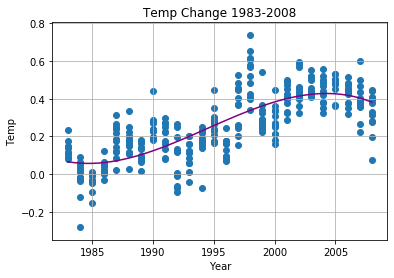

In [193]:
model = np.poly1d(np.polyfit(data['Year'], data['Temp'], 3))

#scatterplot
polyline = np.linspace(1983,2008)
plt.scatter(data['Year'], data['Temp'])
plt.xlabel('Year')
plt.ylabel('Temp')
plt.title('Temp Change 1983-2008')

#fitted polynomial line
plt.plot(polyline, model(polyline), color='purple')
plt.grid()
plt.show()

In [75]:
Jan = data[(data.Month == 1)]
Feb = data[(data.Month == 2)]
Mar = data[(data.Month == 3)]
Apr = data[(data.Month == 4)]
May = data[(data.Month == 5)]
Jun = data[(data.Month == 6)]
Jul = data[(data.Month == 7)]
Aug = data[(data.Month == 8)]
Sep = data[(data.Month == 9)]
Oct = data[(data.Month == 10)]
Nov = data[(data.Month == 11)]
Dec = data[(data.Month == 12)]

[]

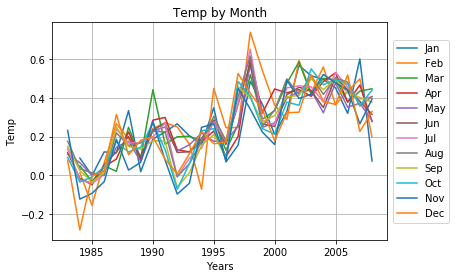

In [76]:
plt.plot(Jan['Year'], Jan['Temp'], label ='Jan')
plt.plot(Feb['Year'], Feb['Temp'], label ='Feb')
plt.plot(Mar['Year'], Mar['Temp'], label ='Mar')
plt.plot(Apr['Year'], Apr['Temp'], label ='Apr')
plt.plot(May['Year'], May['Temp'], label ='May')
plt.plot(Jun['Year'], Jun['Temp'], label ='Jun')
plt.plot(Jul['Year'], Jul['Temp'], label ='Jul')
plt.plot(Aug['Year'], Aug['Temp'], label ='Aug')
plt.plot(Sep['Year'], Sep['Temp'], label ='Sep')
plt.plot(Oct['Year'], Oct['Temp'], label ='Oct')
plt.plot(Nov['Year'], Nov['Temp'], label ='Nov')
plt.plot(Dec['Year'], Dec['Temp'], label ='Dec')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center right')
plt.xlabel('Years')
plt.ylabel('Temp')
plt.title('Temp by Month')
plt.grid()
plt.plot()

In [136]:
data_2 = data[['Year', 'Temp']].copy()

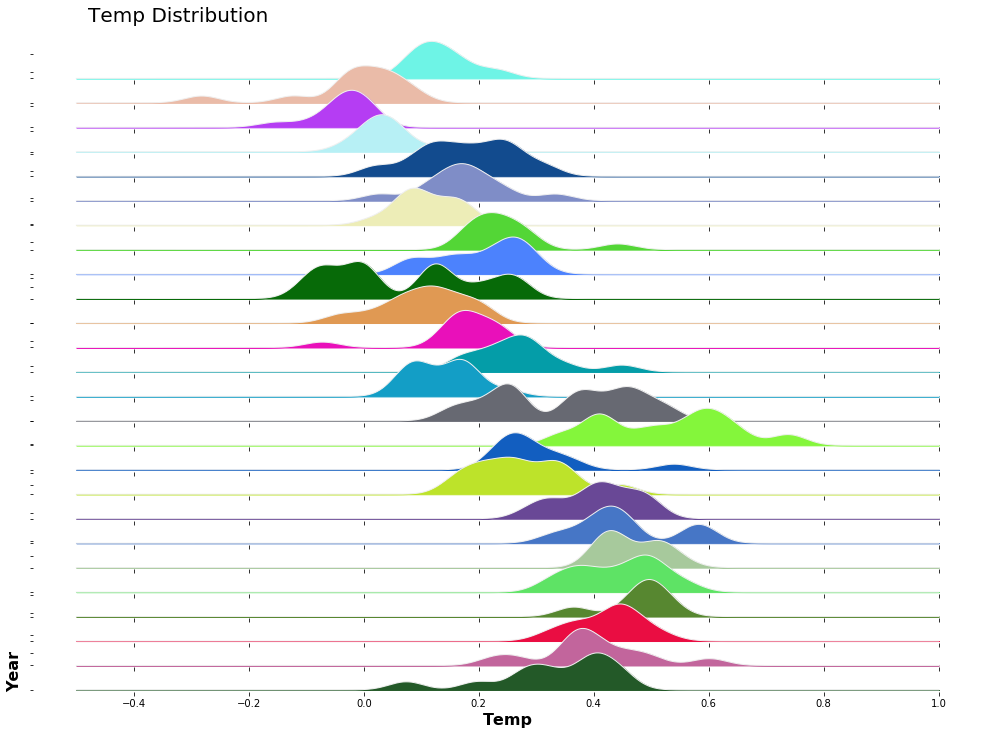

In [195]:
#kde ridge plot
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import random

get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colors = get_colors(26)

Yearss = [x for x in np.unique(data_2.Year)]

gs = grid_spec.GridSpec(len(Yearss),1)
fig = plt.figure(figsize=(17,12))

i = 0

ax_objs = []
for Year in Yearss:
    Year = Yearss[i]
    x = np.array(data[data.Year == Year].Temp)
    x_d = np.linspace(-0.5,1, 1000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])
    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1, color=colors[i])

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and label
    ax_objs[-1].set_yticklabels(["Year"]) 
    
    if i == len(Yearss)-1:
        ax_objs[-1].set_xlabel("Temp", fontsize=16,fontweight="bold")
        ax_objs[-1].set_ylabel("Year", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    i += 1

gs.update(hspace=-0.4)


fig.text(0.17,0.9,"Temp Distribution",fontsize=20)
plt.show()

The years go in order from top (1983) to bottom (2008). From the plot we can see that the distributions increase in Temp over time. 

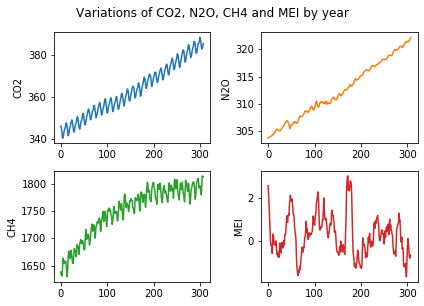

In [187]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data["CO2"])
axs[0, 0].set_ylabel('CO2')
axs[0, 1].plot(data["N2O"],'tab:orange')
axs[0, 1].set_ylabel('N2O')
axs[1, 0].plot(data["CH4"],'tab:green')
axs[1, 0].set_ylabel('CH4')
axs[1, 1].plot(data["MEI"],'tab:red')
axs[1, 1].set_ylabel('MEI')

fig.suptitle('Variations of CO2, N2O, CH4 and MEI by year', y=1.05)

for ax in axs.flat:
    ax.set(xlabel='')

plt.tight_layout()
plt.show()

CO2: From the graph it is clear that CO2 levels have been constantly increasing in atmosphere
    
Methane (CH4): Methane is 20-30% more effective at absorbing infrared radiation than Carbon dioxide. We can see that its levels are constantly rising
    
Multivariate EI Nino Southern Oscillation Index (MEI): There is a seasonality to MEI but not a continuous positive or negative trend

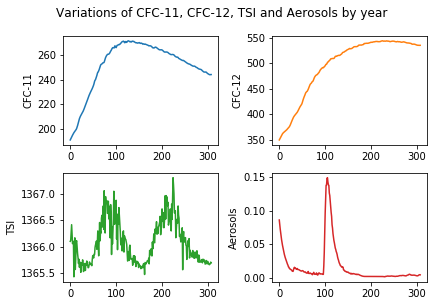

In [188]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data["CFC-11"])
axs[0, 0].set_ylabel('CFC-11')
axs[0, 1].plot(data["CFC-12"],'tab:orange')
axs[0, 1].set_ylabel('CFC-12')
axs[1, 0].plot(data["TSI"],'tab:green')
axs[1, 0].set_ylabel('TSI')
axs[1, 1].plot(data["Aerosols"],'tab:red')
axs[1, 1].set_ylabel('Aerosols')

fig.suptitle('Variations of CFC-11, CFC-12, TSI and Aerosols by year', y=1.05)

for ax in axs.flat:
    ax.set(xlabel='')

plt.tight_layout()
plt.show()

Chlorofluorocarbons (CFC-11 and CFC-12): We can see that after rising steadily there is a decline in levels of CFC-11 and CFC-12 after 2000.

Total Solar Irradiance (TSI): TSI is measured radiation. TSI is a measure of the solar power over all wavelengths per unit area incident on the Earth’s upper atmosphere. Although TSI varies by only a fraction of a percent, it has the greatest magnitude of change. This may be enough to cause observable changes at Earth.

Aerosols: Tiny liquid and solid particles suspended in atmosphere also cause climate change. Atmospheric aerosols influence the climate directly by scattering and absorbing incoming solar radiation.


From these plots we can conclude that pollution is one of the major cause for rising in temperature.

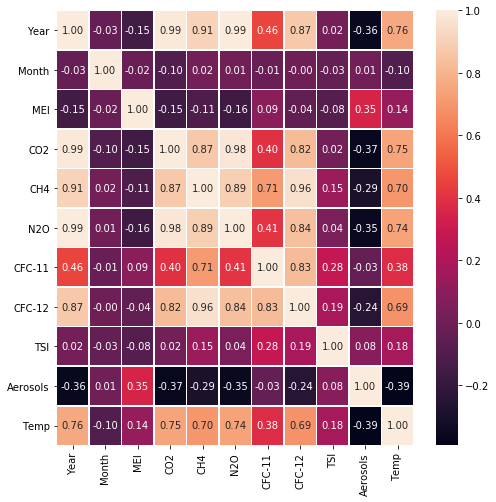

In [25]:
#heat map
f,ax = plt.subplots(figsize = (8, 8))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f', ax = ax)
plt.show()

# Linear Regressions

In [189]:
#CO2 linear regression model
X = pd.DataFrame(data['CO2'])
Y = pd.DataFrame(data['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(246, 1)
(62, 1)


In [160]:
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)

[-3.63084759]
[[0.01069173]]


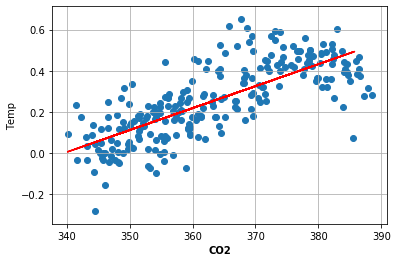

In [161]:
y_pred = result.predict(X_test)
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('CO2',fontweight="bold")
plt.ylabel('Temp')
plt.grid()
plt.show()

[-4.58982404]
[[0.0027686]]


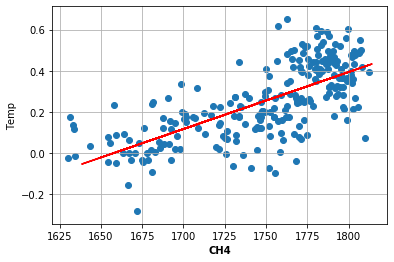

In [162]:
X1 = pd.DataFrame(data['CH4'])
Y1 = pd.DataFrame(data['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X1,Y1, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)
y_pred = result.predict(X_test)
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('CH4',fontweight="bold")
plt.ylabel('Temp')
plt.grid()
plt.show()

[-7.80961051]
[[0.02581112]]


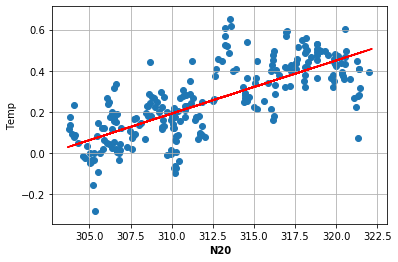

In [163]:
X2 = pd.DataFrame(data['N2O'])
Y2 = pd.DataFrame(data['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X2,Y2, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)
y_pred = result.predict(X_test)
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('N20',fontweight="bold")
plt.ylabel('Temp')
plt.grid()
plt.show()

[-0.57072794]
[[0.00326646]]


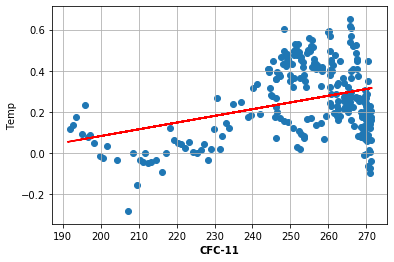

In [164]:
X3 = pd.DataFrame(data['CFC-11'])
Y3 = pd.DataFrame(data['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X3,Y3, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)
y_pred = result.predict(X_test)
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('CFC-11',fontweight="bold")
plt.ylabel('Temp')
plt.grid()
plt.show()

[-0.82033653]
[[0.00215795]]


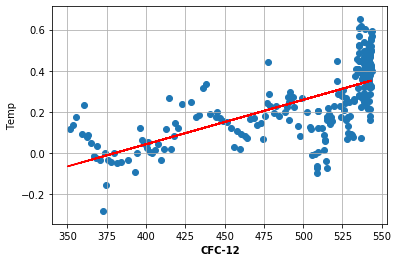

In [165]:
X4 = pd.DataFrame(data['CFC-12'])
Y4 = pd.DataFrame(data['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X4,Y4, test_size=0.2, random_state=1)
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)
y_pred = result.predict(X_test)
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('CFC-12',fontweight="bold")
plt.ylabel('Temp')
plt.grid()
plt.show()

# Multiple Regression Model

In [190]:
#mulitple regression model
mulreg = Jan #Just looking at Jan
mulreg.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
20,1985,1,-0.561,345.25,1663.42,305.301,208.537,373.623,1365.6082,0.0164,-0.001
32,1986,1,-0.307,346.54,1675.82,305.775,218.382,396.082,1365.6746,0.0146,0.121
44,1987,1,1.237,348.38,1692.74,306.368,229.846,412.920,1365.6674,0.0118,0.116
56,1988,1,1.092,350.38,1698.29,306.636,241.155,438.296,1366.0546,0.0085,0.334


In [67]:
X = pd.DataFrame(mulreg.iloc[:,[0,1]])
Y = pd.DataFrame(mulreg['Temp'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_Test.shape)

(20, 2)
(5, 2)
(20, 1)
(5, 1)


In [68]:
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, Y_train)
print(result.intercept_)
print(result.coef_)

[-28.69421796]
[[0.01450833 0.        ]]


In [69]:
y_pred = result.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
X_test1 = pd.DataFrame(X_test.iloc[:,[0]])
X_train1 = pd.DataFrame(X_train.iloc[:,[0]])

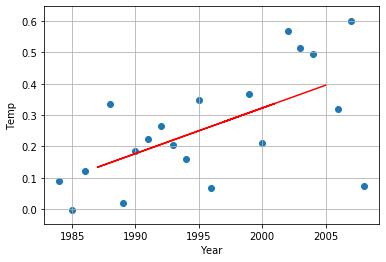

In [70]:
plt.scatter(X_train1, Y_train)
plt.plot(X_test1, y_pred, color='r')
plt.xlabel('Year')
plt.ylabel('Temp')
plt.grid()
plt.show()